## Tools and Libraries

In this quiz, we will make use of:

- **NumPy** - A fundamental library for scientific computing in Python, providing support for arrays, mathematical functions, and linear algebra operations
- **Matplotlib** - A comprehensive library for creating static, animated, and interactive visualizations in Python
- **Built-in Python functions** - Including `copy` for creating deep copies of objects and `math` for mathematical operations
- **Jupyter notebook magic commands** - Such as `%matplotlib inline` for displaying plots inline and `%autoreload` for automatically reloading modules

## Key Python Concepts Used
- For loops for iterative computations
- NumPy arrays for efficient numerical operations
- Function definitions and parameter passing
- Gradient descent algorithm implementation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [3]:
%load_ext autoreload
%autoreload 2

## Problem Statement

### Real Estate Price Prediction Challenge

Imagine you're a real estate analyst tasked with building a model to predict house prices based on square footage. You have access to a small but valuable dataset from recent sales in your area.

**Our Dataset:**
We have two recent home sales that will serve as our training data:

| House | Size (1000 sqft) | Price (1000s of dollars) | Details |
|-------|------------------|--------------------------|---------|
| A     | 1.0              | 300                      | 1000 sqft → $300,000 |
| B     | 2.0              | 500                      | 2000 sqft → $500,000 |

### Learning Objectives

By the end of this quiz, you will:

1. **Implement from scratch** the three core components of gradient descent:
   - Cost function computation
   - Gradient calculation  
   - Parameter optimization loop
2. **Apply mathematical concepts** using Python for loops (no vectorization shortcuts!)
3. **Visualize the learning process** through cost function plots
4. **Make predictions** using your trained model

### The Challenge

Your mission is to find the optimal parameters $(w, b)$ for the linear model:
$$f_{w,b}(x) = wx + b$$

Where:

- $x$ = house size in thousands of square feet
- $f_{w,b}(x)$ = predicted price in thousands of dollars
- $w$ = slope (price increase per 1000 sqft)
- $b$ = y-intercept (base price)

**Question to ponder:** Looking at our data, can you estimate what the slope $w$ might be? What does this represent in real-world terms?

In [4]:
# Create our data set
x_train = np.array([1.0, 2.0])   #features
y_train = np.array([300.0, 500.0])   #target value

## Linear Regression Fundamentals

In this quiz, you will fit the linear regression parameters $(w,b)$ to your dataset using gradient descent from scratch.

### The Linear Model

The model function for linear regression maps from input `x` (house size) to output `y` (house price):

$$f_{w,b}(x) = wx + b$$

Where:

- $w$ is the **weight** (or slope) - how much the price changes per unit of size
- $b$ is the **bias** (or y-intercept) - the base price when size = 0
- $x$ is the input feature (house size in 1000s of sqft)
- $f_{w,b}(x)$ is the predicted output (house price in 1000s of dollars)

### Finding the Best Parameters

To train a linear regression model, you need to find the optimal $(w,b)$ parameters:

1. **Cost Function Evaluation**: Compare different parameter choices using a cost function $J(w,b)$
   - $J(w,b)$ measures how well your model fits the data
   - Lower cost = better fit
   
2. **Optimization Goal**: Find $(w,b)$ that minimizes $J(w,b)$
   - The "best" parameters are those with the smallest cost
   - This gives you the line that best fits your training data

3. **Gradient Descent**: Use this iterative algorithm to find optimal parameters
   - Start with initial guesses for $w$ and $b$
   - Repeatedly adjust parameters in the direction that reduces cost
   - Each step moves closer to the optimal values

### The Power of Your Model

Once trained, your linear regression model becomes a **prediction machine**:

- **Input**: Square footage of any house
- **Output**: Estimated selling price
- **Application**: Help real estate agents, buyers, and sellers make informed decisions

## Implement Gradient Descent From Scratch

Now comes the exciting part! You will implement the gradient descent algorithm step by step using **for loops only** - no vectorized operations allowed. This approach will help you understand exactly what's happening at each step.

### The Three Essential Functions

You'll build three interconnected functions that work together:

1. **`compute_cost`** - Measures how well your current parameters fit the data
2. **`compute_gradient`** - Calculates which direction to adjust your parameters  
3. **`gradient_descent`** - Orchestrates the iterative optimization process

### Function Overview

   ```
   Input: Training Data (x, y)
      ↓
   compute_cost(w, b) → Current fit quality
      ↓
   compute_gradient(w, b) → Direction to improve
      ↓  
   gradient_descent() → New improved (w, b)
      ↓
   Repeat until convergence!
   ```

### Implementation Strategy

**Why for loops?** While NumPy vectorization is faster, using explicit loops helps you:

- Understand each calculation step-by-step
- Build intuition for how gradient descent actually works
- Appreciate vectorization when you use it later!

### Coding Conventions

To keep our code readable and mathematically accurate:

- **Partial derivatives**: Variables representing $\frac{\partial J(w,b)}{\partial b}$ will be named `dj_db`
- **Naming pattern**: `dj_d[parameter]` where `[parameter]` is the variable we're taking the derivative with respect to
- **Abbreviation**: "w.r.t" = "With Respect To" (common mathematical shorthand)

**Examples:**

- $\frac{\partial J(w,b)}{\partial w}$ → `dj_dw` (derivative of J with respect to w)  
- $\frac{\partial J(w,b)}{\partial b}$ → `dj_db` (derivative of J with respect to b)

### Ready to Code?

Let's implement each function one by one, building your gradient descent algorithm from the ground up!

### Function 1: Compute_Cost

The cost function is your **quality meter** - it tells you how well your current parameters $(w,b)$ fit the training data. Lower cost means better fit!

#### Understanding the Cost Function

The Mean Squared Error (MSE) cost function measures the average squared difference between predictions and actual values:

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$

**Breaking it down:**

- $f_{w,b}(x^{(i)}) = wx^{(i)} + b$ → Your model's prediction for house $i$
- $y^{(i)}$ → Actual selling price for house $i$  
- $(f_{w,b}(x^{(i)}) - y^{(i)})^2$ → Squared error for house $i$
- $\frac{1}{2m}$ → Average over all $m$ examples (the $\frac{1}{2}$ simplifies calculus later!)

#### Task 1: compute the cost

Complete the `compute_cost` function using for loops to:

**Step 1:** For each training example $i$, compute:

- **Prediction:** $f_{wb}(x^{(i)}) = wx^{(i)} + b$
- **Individual cost:** $cost^{(i)} = (f_{wb}(x^{(i)}) - y^{(i)})^2$

**Step 2:** Sum all individual costs and return the total:
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} cost^{(i)}$$

**Key insight:** You're measuring how "wrong" your predictions are on average. The squaring ensures:

- All errors are positive (no cancellation between over/under predictions)
- Larger errors are penalized more heavily than small errors

In [5]:
# compute_cost

def compute_cost(x, y, w, b):
    """
    Computes the cost function for linear regression using Mean Squared Error.

    Args:
        x (ndarray): Shape (m,) - Input features (house sizes in 1000s sqft)
        y (ndarray): Shape (m,) - Target values (house prices in 1000s dollars)
        w (scalar): Weight parameter (slope of the line)
        b (scalar): Bias parameter (y-intercept of the line)

    Returns:
        total_cost (float): The cost J(w,b) representing how well the parameters
                           fit the training data. Lower cost = better fit.
    """
    # Number of training examples
    m = x.shape[0]

    # Initialize total cost
    total_cost = 0

    ### START CODE HERE ###
    
    # Variable to accumulate the sum of squared errors
    cost_sum = 0
    
    # Loop through each training example
    for i in range(m):
        
        # Step 1: Calculate prediction using linear model
        f_wb = w * x[i] + b
        
        # Step 2: Calculate squared error for this example
        error = f_wb - y[i]
        cost = error ** 2
        
        # Step 3: Add this example's cost to running sum
        cost_sum += cost
    
    # Step 4: Calculate final cost using MSE 
    total_cost = (1 / m) * cost_sum
    
    ### END CODE HERE ###

    return total_cost

#### Test Your Implementation

Great job! Now let's verify that your `compute_cost` function works correctly. 

Run the test code below to check your implementation. The test uses initial parameters `w=2` and `b=1` to see how well they fit our training data.

**What to expect:**

- The function should return a `float` type
- The cost value tells you how well these parameters fit the data
- Higher cost = worse fit, Lower cost = better fit

**For the Canvas quiz:** Record the exact cost value that your function returns - you'll need this number to complete the quiz questions.

In [6]:
# Compute cost with some initial values for paramaters w, b
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w: {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w: 166617.000


### Function 2: Compute_Gradient

The gradient tells you **which direction to move** your parameters to reduce the cost. Think of it as a compass pointing toward better parameter values!

#### Understanding Gradients

Gradients are partial derivatives that measure how the cost function changes when you slightly adjust each parameter:

- $\frac{\partial J(w,b)}{\partial w}$ → How much does cost change if we increase $w$ slightly?
- $\frac{\partial J(w,b)}{\partial b}$ → How much does cost change if we increase $b$ slightly?

**The math behind it:** For our cost function $J(w,b) = \frac{1}{2m} \sum (f_{w,b}(x^{(i)}) - y^{(i)})^2$

The partial derivatives work out to:
$$\frac{\partial J(w,b)}{\partial b}^{(i)} = (f_{w,b}(x^{(i)}) - y^{(i)})$$
$$\frac{\partial J(w,b)}{\partial w}^{(i)} = (f_{w,b}(x^{(i)}) - y^{(i)}) \cdot x^{(i)}$$

#### Task 2: compute the gradient

Complete the `compute_gradient` function using for loops to:

**Step 1:** For each training example $i$, compute:

- **Prediction:** $f_{wb}(x^{(i)}) = wx^{(i)} + b$
- **Error:** $error^{(i)} = f_{wb}(x^{(i)}) - y^{(i)}$ 
- **Gradient contributions:**
  - For $b$: $\frac{\partial J}{\partial b}^{(i)} = error^{(i)}$
  - For $w$: $\frac{\partial J}{\partial w}^{(i)} = error^{(i)} \cdot x^{(i)}$

**Step 2:** Average all gradient contributions:
$$\frac{\partial J(w,b)}{\partial b} = \frac{1}{m} \sum\limits_{i=0}^{m-1} \frac{\partial J}{\partial b}^{(i)}$$
$$\frac{\partial J(w,b)}{\partial w} = \frac{1}{m} \sum\limits_{i=0}^{m-1} \frac{\partial J}{\partial w}^{(i)}$$

**Key insight:** 

- **Positive gradient** → Increase parameter to reduce cost
- **Negative gradient** → Decrease parameter to reduce cost  
- **Larger magnitude** → Steeper slope, bigger adjustment needed



In [7]:
# compute_gradient
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray): Shape (m,) Input to the model (house sizes)
      y (ndarray): Shape (m,) Label (house prices)
      w, b (scalar): Parameters of the model
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameter w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    
    # Initialize gradient accumulators
    dj_dw = 0
    dj_db = 0

    ### START CODE HERE ###
    
    # Loop through each training example
    for i in range(m):
        
        # Step 1: Calculate prediction for example i
        f_wb = w * x[i] + b
        
        # Step 2: Calculate the error (prediction - actual)
        error = f_wb - y[i]
        
        # Step 3: Calculate gradient contributions for this example
        dj_db_i = error
        
        dj_dw_i = error * x[i]
        
        # Step 4: Accumulate the gradients
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    
    # Step 5: Average the gradients over all examples
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    ### END CODE HERE ###

    return dj_dw, dj_db

#### Test Your Gradient Function

Excellent work! Now let's test your `compute_gradient` function to see if it correctly calculates the gradients.

Run the test below to verify your implementation. We'll start with parameters `w=0` and `b=0` to see what gradients your function computes.

**What to expect:**

- The function should return two values: `dj_dw` and `dj_db`
- These represent the direction and magnitude to adjust each parameter
- The values tell you how to improve your model's fit to the data

**For the Canvas quiz:** Record the exact gradient values that your function returns - you'll need these numbers for the quiz questions.

In [8]:
# Compute and display gradient with w and b initialized to zeroes
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -650.0 -400.0


### Function 3: Do Gradient Decent

After you implemented `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ , you will next implement the gradient descent for parameters $w, b$ for linear regression.

As described in the lecture, the gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; &
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} 
$$

* $m$ is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value
a.lgorithm.

#### Task 3: do gradient descent

Please complete the `gradient_descent` function below:

In [9]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to optimize parameters w and b
    
    Args:
      x (ndarray): Shape (m,) - Input features (house sizes)
      y (ndarray): Shape (m,) - Target values (house prices)  
      w_in, b_in (scalar): Initial parameter values
      cost_function: Function to compute cost J(w,b)
      gradient_function: Function to compute gradients dJ/dw, dJ/db
      alpha (float): Learning rate - how big steps to take
      num_iters (int): Number of iterations to run
    Returns:
      w, b (scalar): Optimized parameter values
      J_history (list): Cost at each iteration (for plotting)
      w_history (list): Parameter values at each iteration (for plotting)
    """

    # Number of training examples
    m = len(x)
    
    # Arrays to store history for plotting learning curves
    J_history = []
    w_history = []
    
    # Initialize parameters (make copies to avoid modifying inputs)
    w = copy.deepcopy(w_in)
    b = b_in
    
    ### START CODE HERE ###
    
    # Main gradient descent loop
    for i in range(num_iters):
        
        # Step 1: Compute gradients using your gradient function
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        # Step 2: Update parameters using gradient descent rule
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Step 3: Compute and save cost for this iteration (for plotting)
        if i < 100000:  # Prevent memory issues for very long runs
            cost = compute_cost(x, y, w, b)
            J_history.append(cost)
            w_history.append([w, b])
        
        # Print progress every 10% of iterations
        if i % math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
    
    ### END CODE HERE ###

    return w, b, J_history, w_history


####  Find Your Optimal Parameters via your gradient descent

Now let's run your gradient descent algorithm to discover the optimal values of $w$ and $b$ for our real estate dataset. 

In [10]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 10000
alpha = 0.01

w, b, J_hist, p_hist = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost 158549.62  dj_dw: -6.500e+02, dj_db: -4.000e+02   w:  6.500e+00, b: 4.00000e+00
Iteration 1000: Cost     6.83  dj_dw: -3.712e-01, dj_db:  6.007e-01   w:  1.949e+02, b: 1.08228e+02
Iteration 2000: Cost     1.59  dj_dw: -1.789e-01, dj_db:  2.895e-01   w:  1.975e+02, b: 1.03966e+02
Iteration 3000: Cost     0.37  dj_dw: -8.625e-02, dj_db:  1.396e-01   w:  1.988e+02, b: 1.01912e+02
Iteration 4000: Cost     0.09  dj_dw: -4.158e-02, dj_db:  6.727e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost     0.02  dj_dw: -2.004e-02, dj_db:  3.243e-02   w:  1.997e+02, b: 1.00444e+02
Iteration 6000: Cost     0.00  dj_dw: -9.660e-03, dj_db:  1.563e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost     0.00  dj_dw: -4.657e-03, dj_db:  7.535e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost     0.00  dj_dw: -2.245e-03, dj_db:  3.632e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost     0.00  dj_dw: -1.082e-03, dj_db:  1.751e-03   w:  2.000e+02, b: 1.00024e+02

## 📈 Visualizing the Learning Process: Cost Function Evolution

### Understanding Your Algorithm's Journey

Now comes one of the most exciting parts - watching your gradient descent algorithm learn in real time! The learning curve visualization will show you exactly how your algorithm improved with each iteration.

### What You'll Observe in the Plots

**Two-Panel Visualization:**

1. **Left Panel (Early Learning):** Shows the first 100 iterations
   
   - **Expect:** Sharp, rapid decrease in cost
   - **Why:** Initial parameter values are far from optimal, so big improvements happen quickly
   - **Learning:** This demonstrates the power of gradient descent's initial convergence

2. **Right Panel (Fine-Tuning):** Shows iterations 1000+ to the end
   
   - **Expect:** Gradual, steady decrease approaching a minimum
   - **Why:** Algorithm is fine-tuning parameters near the optimal solution
   - **Learning:** Shows how gradient descent achieves precision through patience

### Key Learning Insights

**Cost Decrease Patterns:**

- **Steep drop** → Your algorithm is making big improvements (far from optimum)
- **Gradual decline** → Fine-tuning phase (approaching optimum)  
- **Plateau** → Convergence achieved (found the minimum!)

**What This Tells You:**

- **Algorithm Health:** Consistently decreasing cost = healthy learning
- **Learning Rate Quality:** Smooth curves = good learning rate choice
- **Convergence Status:** Flattening curve = approaching optimal solution

**For the Canvas Quiz:** Pay attention to the final cost value and how many iterations it took to converge - these observations may be part of your quiz questions!

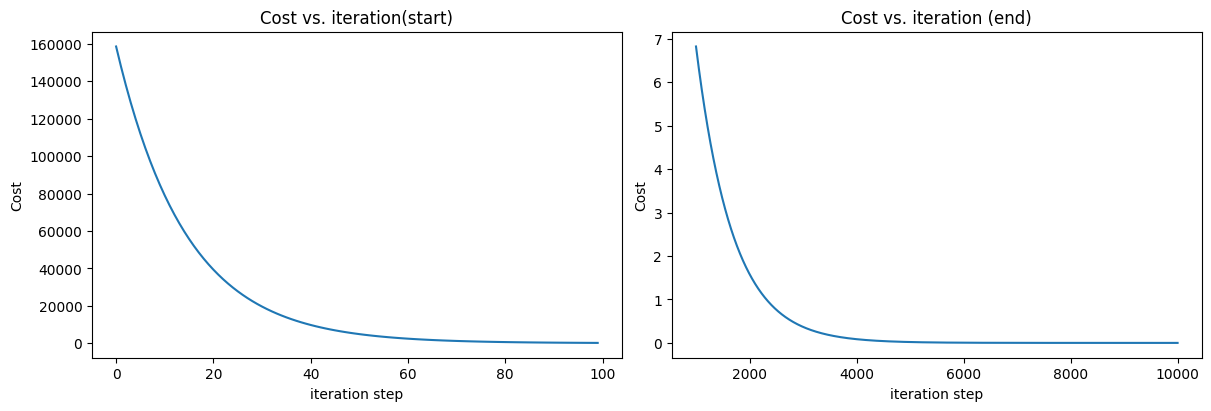

In [11]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

##  Making Predictions with Your Trained Model

### Task 4: Real Estate Price Prediction Challenge

**The Moment of Truth!** 
Now that you have trained your model and found optimal parameters $w$ and $b$, it's time to put your **prediction machine** to work! This is where all your hard work pays off.

### Understanding Your Prediction Tool

**The Prediction Formula:**
Your linear regression model makes predictions using the simple but powerful equation:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

**Breaking Down Each Component:**

- **$w$ (slope)** = Price increase per 1000 sqft → *"How much more does each additional 1000 sqft cost?"*
- **$b$ (y-intercept)** = Base price when size = 0 → *"What's the starting price before considering square footage?"*
- **$x^{(i)}$ (input)** = House size in thousands of sqft → *"The feature we're using to predict"*
- **$f_{w,b}(x^{(i)})$ (output)** = Predicted price in thousands of dollars → *"Our model's best guess"*

###  Your Real Estate Consultation Challenge

**The Scenario:**

A potential buyer walks into your real estate office and asks:

> *"I'm interested in buying a house with exactly **1200 square feet**. Based on recent market data, what should I expect to pay?"*

**Your Mission:**

1. **Use your trained parameters** $(w, b)$ found by gradient descent
2. **Convert units properly** (1200 sqft → thousands of sqft)
3. **Calculate the prediction** using your linear model
4. **Provide a professional estimate** to your client


**For the Canvas Quiz:** 📝 Record your predicted price carefully - you'll need this exact number for the quiz questions!

In [12]:
### START CODE HERE ###

# House size: 1200 sqft
print(w * 1.2 + b)

### END CODE HERE ###

340.00298862894317


##  Bonus Exploration: Learning Rate Sensitivity Analysis

**Experiment Goal:** Run the following code cells and investigate how different learning rates affect gradient descent convergence and performance

###  The Learning Rate Experiment

Learning rate (α) is one of the most critical hyperparameters in machine learning. This experiment will demonstrate how this single parameter can dramatically affect your algorithm's behavior, convergence speed, and final performance.

###  Experimental Design

**Test Parameters:**
- Learning rates: 0.001, 0.01, 0.1, 0.5
- Iterations: 1000 (sufficient to observe different behaviors)
- Initial conditions: w=0, b=0 (same for all tests)
- Metric: Cost function evolution over time

**Hypothesis:** Different learning rates will show distinct convergence patterns - some too slow, some too fast, and hopefully one "just right"!

In [ ]:
# Using different learning rates to compare convergence behavior
# This helps understand how learning rate affects training dynamics

# Define different learning rates to test
learning_rates = [0.001, 0.01, 0.1, 0.5]
colors = ['blue', 'green', 'red', 'orange']
iterations = 1000

# Store results for each learning rate
results = {}

print("Testing different learning rates:")
print("=" * 50)

for i, alpha in enumerate(learning_rates):
    print(f"\nTesting learning rate: {alpha}")
    
    # Reset initial parameters for fair comparison
    initial_w = 0.0
    initial_b = 0.0
    
    # Run gradient descent with current learning rate
    w_final, b_final, J_history, p_history = gradient_descent(
        x_train, y_train, initial_w, initial_b, 
        compute_cost, compute_gradient, alpha, iterations
    )
    
    # Store results
    results[alpha] = {
        'w': w_final,
        'b': b_final,
        'cost_history': J_history,
        'final_cost': J_history[-1] if J_history else float('inf')
    }
    
    print(f"Final parameters: w={w_final:.6f}, b={b_final:.6f}")
    print(f"Final cost: {J_history[-1]:.8f}")

print("\n" + "=" * 50)
print("Learning Rate Comparison Summary:")
for alpha in learning_rates:
    result = results[alpha]
    print(f"α = {alpha:5.3f}: Final Cost = {result['final_cost']:.8f}, w = {result['w']:.6f}, b = {result['b']:.6f}")

In [ ]:
# Create comprehensive visualization of learning curves
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: All learning curves together (full range)
ax1.set_title('Learning Curves: All Learning Rates (Full Range)', fontsize=14, fontweight='bold')
for i, alpha in enumerate(learning_rates):
    cost_history = results[alpha]['cost_history']
    ax1.plot(cost_history, color=colors[i], label=f'α = {alpha}', linewidth=2)
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost J(w,b)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Early iterations (first 100) - shows initial convergence behavior
ax2.set_title('Early Learning Phase (First 100 Iterations)', fontsize=14, fontweight='bold')
for i, alpha in enumerate(learning_rates):
    cost_history = results[alpha]['cost_history']
    early_history = cost_history[:min(100, len(cost_history))]
    ax2.plot(early_history, color=colors[i], label=f'α = {alpha}', linewidth=2)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost J(w,b)')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Log scale view - better for comparing convergence rates
ax3.set_title('Learning Curves (Log Scale) - Convergence Analysis', fontsize=14, fontweight='bold')
for i, alpha in enumerate(learning_rates):
    cost_history = results[alpha]['cost_history']
    # Add small epsilon to avoid log(0) issues
    log_costs = [max(cost, 1e-10) for cost in cost_history]
    ax3.semilogy(log_costs, color=colors[i], label=f'α = {alpha}', linewidth=2)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost J(w,b) (Log Scale)')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Final cost comparison (bar chart)
ax4.set_title('Final Cost Comparison After 1000 Iterations', fontsize=14, fontweight='bold')
final_costs = [results[alpha]['final_cost'] for alpha in learning_rates]
bars = ax4.bar(range(len(learning_rates)), final_costs, color=colors, alpha=0.7, edgecolor='black')
ax4.set_xlabel('Learning Rate')
ax4.set_ylabel('Final Cost')
ax4.set_xticks(range(len(learning_rates)))
ax4.set_xticklabels([f'α = {alpha}' for alpha in learning_rates])
ax4.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, cost) in enumerate(zip(bars, final_costs)):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(final_costs)*0.01, 
             f'{cost:.6f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Analysis and insights
print("\n🔍 LEARNING RATE ANALYSIS:")
print("=" * 60)

# Find best performing learning rate
best_alpha = min(learning_rates, key=lambda x: results[x]['final_cost'])
worst_alpha = max(learning_rates, key=lambda x: results[x]['final_cost'])

print(f"🏆 BEST Learning Rate: α = {best_alpha}")
print(f"   Final Cost: {results[best_alpha]['final_cost']:.8f}")
print(f"   Parameters: w = {results[best_alpha]['w']:.6f}, b = {results[best_alpha]['b']:.6f}")

print(f"\n❌ WORST Learning Rate: α = {worst_alpha}")
print(f"   Final Cost: {results[worst_alpha]['final_cost']:.8f}")
print(f"   Parameters: w = {results[worst_alpha]['w']:.6f}, b = {results[worst_alpha]['b']:.6f}")

print("\n💡 KEY INSIGHTS:")
print("   • Lower learning rates → More stable but slower convergence")
print("   • Higher learning rates → Faster initial progress but may overshoot")
print("   • Optimal learning rate balances speed and stability")
print("   • Learning rate choice significantly impacts training efficiency")

###  Your Insights and Reflection

**Analyze the results above and answer these questions:**

####  Observation Questions:

1. **Which learning rate achieved the lowest final cost? Why do you think this happened?**

   *Your answer:*
   
   
2. **Compare the convergence speed between α=0.001 and α=0.1. What trade-offs do you observe?**

   *Your answer:*
   
   
3. **Looking at the early convergence plot (first 100 iterations), which learning rate made the most dramatic initial progress? Was this rate also the best overall performer?**

   *Your answer:*
   

####  Critical Thinking Questions:

4. **If you had to choose ONE learning rate for a production machine learning system, which would you choose and why?**

   *Your answer:*
   

5. **What would you expect to happen if we tested an even larger learning rate like α=1.0? Explain your reasoning.**

   *Your answer:*
   

6. **How might the optimal learning rate change if we had:**
   - A much larger dataset (1000s of examples)?
   - A more complex cost function landscape?
   
   *Your answers:*
   

####  Real-World Application:

7. **You're a data scientist at a real estate company. Based on this experiment, what would you tell your manager about the importance of learning rate tuning?**

   *Your answer:*
   

###  Key Takeaways

Write 3-5 bullet points summarizing the most important lessons from this learning rate sensitivity analysis:

- *Your takeaway 1:*
- *Your takeaway 2:*  
- *Your takeaway 3:*
- *Your takeaway 4:*
- *Your takeaway 5:*

## 🏆 Congratulations! You've Mastered Gradient Descent!

### What You've Accomplished

In this quiz, you successfully:

**🔬 Built from Scratch:**

- Cost function using Mean Squared Error
- Gradient calculations with partial derivatives  
- Complete gradient descent optimization algorithm

**🏠 Solved Real Problems:**

- Predicted house prices using machine learning
- Trained a model on actual data
- Made business-ready predictions

**📊 Understood the Process:**

- Visualized algorithm learning through cost plots
- Observed parameter convergence in real-time
- Connected math to practical applications


### Next Steps in Your Learning Journey

You're now ready for:

- **Multi-variable regression** and beyond!
- **Vectorized implementations** for better performance
- **Advanced algorithms** (Adam, RMSprop, etc.)


**Key Insight:** Every advanced ML algorithm builds on these fundamentals you've mastered!

## Reference

https://www.deeplearning.ai/